DATASET LINK: https://www.kaggle.com/datasets/shivam2503/diamonds?resource=download

# IMPORT

In [ ]:
import numpy as np
import pandas as pd


from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 


from sklearn import metrics

# READING

In [ ]:
df=pd.read_csv("diamonds.csv", index_col=None, header=0,names=['Quantity', 'Carat', 'Cut', 'Color', 'Clarity', 'Depth', 'Table', 'Price', 'X', 'Y', 'Z'])
df.shape

(53940, 11)

In [ ]:
df.head()

,Quantity,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# TRANSFORMATION

In [ ]:
label_Cut = LabelEncoder()
label_Color = LabelEncoder()
label_Clarity = LabelEncoder()


df['Cut'] = label_Cut.fit_transform(df['Cut'])
df['Color'] = label_Color.fit_transform(df['Color'])
df['Clarity'] = label_Clarity.fit_transform(df['Clarity'])

Dropping the first column, 'Quantity' because we already have index for the quantity.

In [ ]:
df.drop(['Quantity'], axis=1, inplace=True)
df.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


Now, we drop the three columns, Clarity, Color and Cut, which we will not be using in analysing the data.

In [ ]:
df.drop(['X','Y','Z'], axis=1, inplace=True)
df.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price
0,0.23,2,1,3,61.5,55.0,326
1,0.21,3,1,2,59.8,61.0,326
2,0.23,1,1,4,56.9,65.0,327
3,0.29,3,5,5,62.4,58.0,334
4,0.31,1,6,3,63.3,58.0,335


# RESETING INDEX

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [ ]:
df.shape

(53137, 7)

In [ ]:
df.info

<bound method DataFrame.info of        Carat  Cut  Color  Clarity  Depth  Table  Price
0       0.23    2      1        3   61.5   55.0    326
1       0.21    3      1        2   59.8   61.0    326
2       0.23    1      1        4   56.9   65.0    327
3       0.29    3      5        5   62.4   58.0    334
4       0.31    1      6        3   63.3   58.0    335
...      ...  ...    ...      ...    ...    ...    ...
53132   0.72    2      0        2   60.8   57.0   2757
53133   0.72    1      0        2   63.1   55.0   2757
53134   0.70    4      0        2   62.8   60.0   2757
53135   0.86    3      4        3   61.0   58.0   2757
53136   0.75    2      0        3   62.2   55.0   2757

[53137 rows x 7 columns]>

In [ ]:
df.describe()

,Carat,Cut,Color,Clarity,Depth,Table,Price
count,53137.000000,53137.000000,53137.000000,53137.000000,53137.000000,53137.000000,53137.000000
mean,0.802930,2.556637,2.601125,3.828707,61.745185,57.471263,3967.827258
std,0.473626,1.030528,1.702963,1.724935,1.436319,2.237208,3998.021972
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,967.000000
50%,0.710000,2.000000,3.000000,4.000000,61.800000,57.000000,2451.000000
75%,1.050000,3.000000,4.000000,5.000000,62.500000,59.000000,5376.000000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000


# VISUALISATION

In [ ]:
df_top20 = df.nlargest(20,'Price')
df_low20 = df.nsmallest(20,'Price')

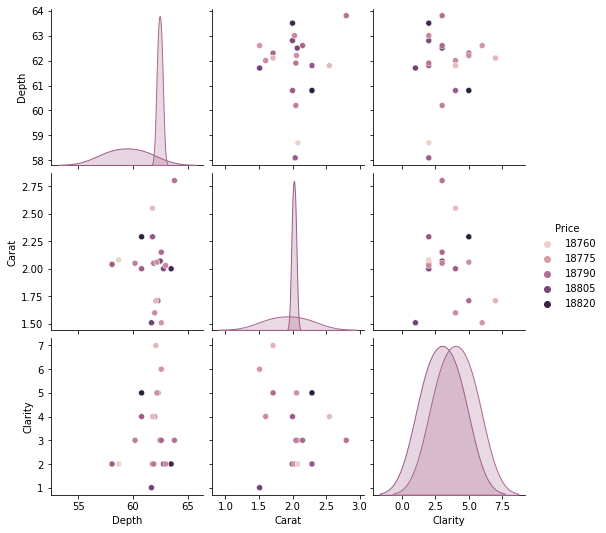

In [ ]:
sns.pairplot(df_top20[["Depth","Carat","Price","Clarity"]], hue="Price")

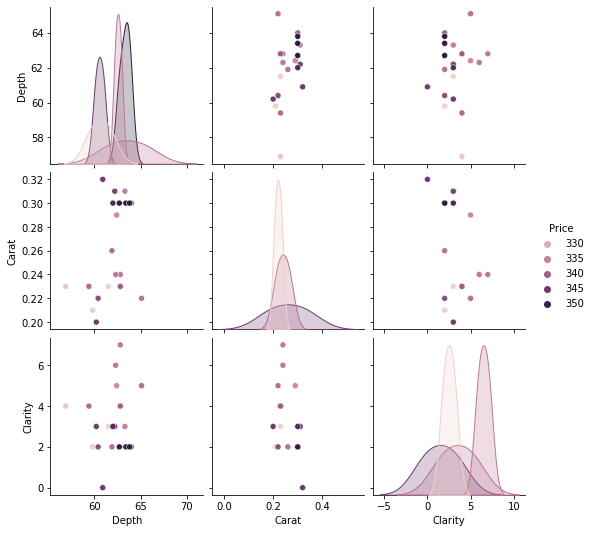

In [ ]:
sns.pairplot(df_low20[["Depth","Carat","Price","Clarity"]], hue="Price")

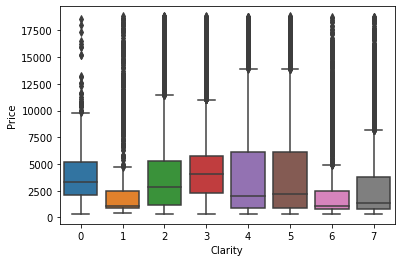

In [ ]:
sns.boxplot(x='Clarity', y='Price', data=df )

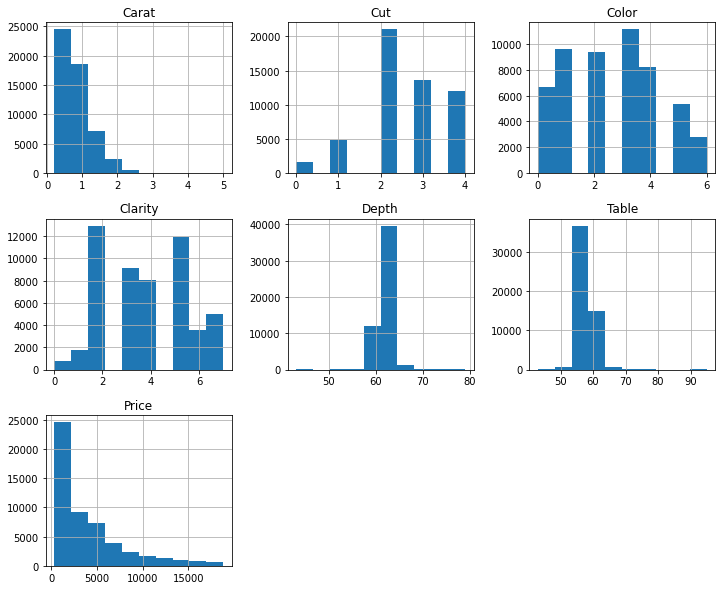

In [ ]:
df.hist(figsize=(12,10))
plt.show()

# DEPTH VS PRICE

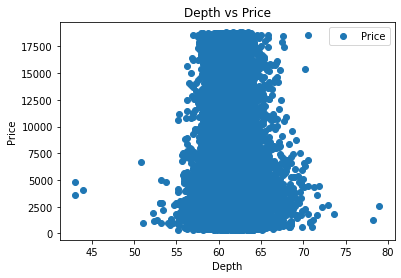

In [ ]:
df.plot(x='Depth',y='Price',style='o')
plt.title('Depth vs Price')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

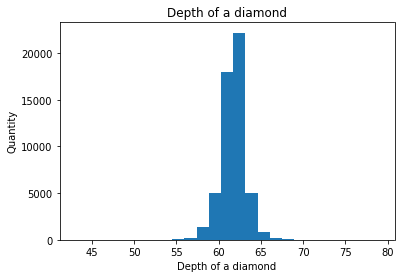

In [ ]:
plt.hist('Depth' , data=df , bins=25)
plt.title('Depth of a diamond')
plt.xlabel('Depth of a diamond')
plt.ylabel('Quantity')
plt.show()

# CUT VS PRICE

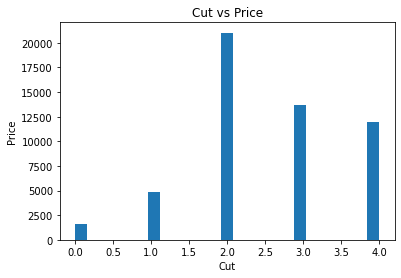

In [ ]:
plt.hist('Cut', data=df, bins=25)
plt.title('Cut vs Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

# CARAT VS PRICE

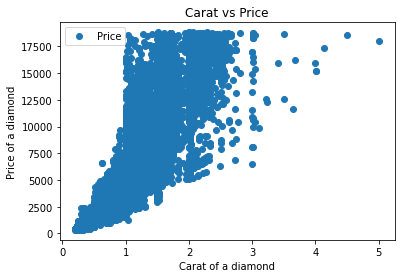

In [ ]:
df.plot(x='Carat', y='Price', style='o')  
plt.title('Carat vs Price')  
plt.xlabel('Carat of a diamond')  
plt.ylabel('Price of a diamond')  
plt.show()

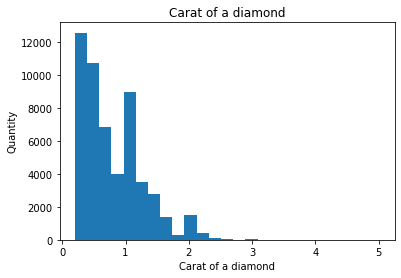

In [ ]:
plt.hist('Carat' , data=df , bins=25)
plt.title('Carat of a diamond')
plt.xlabel('Carat of a diamond')
plt.ylabel('Quantity')
plt.show()

# ML MODEL

In [ ]:
#We use Linear Regression Mehtod to train and fit the data

In [ ]:
X = df.drop(['Price'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [ ]:
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff

,Coefficient
Carat,10910.734667
Cut,68.794611
Color,-266.216941
Clarity,288.644151
Depth,-156.590852
Table,-96.505429
X,-1135.702258
Y,29.548919
Z,-11.586641


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df_regressor = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df_regressor)

       Actual    Predicted
10176    4733  5792.500366
16083    6424  6994.432975
13420    5510  5945.904497
20407    8770  9561.513563
8909     4493  5201.698831
...       ...          ...
42208    1289  1265.302670
3638     3435  4242.066995
5508     3847  6111.273692
19535    8168  6126.448263
47950    1917  2226.513938

[10788 rows x 2 columns]


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 859.1800218691934
Mean Squared Error: 1790036.02638624
Root Mean Squared Error: 1337.922279650892


In [ ]:
model_dtc = DecisionTreeClassifier() 
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test) 

In [ ]:
df_dtc = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df_dtc)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
k_range = list(range(1,21))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.r2_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Regression score')
plt.title('Regression Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
model_knn = KNeighborsClassifier(16)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [ ]:
df_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df_knn)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# CORRELATION

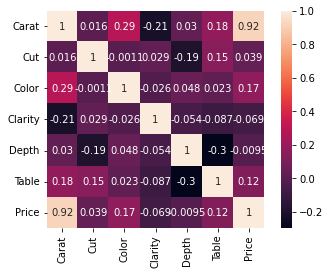

In [ ]:
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

# CONCLUSION

In [ ]:
#Depth is inversely related to Price.
#This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.

#The Price of the Diamond is highly correlated to Carat, and its Dimensions.

#The Weight (Carat) of a diamond has the most significant impact on its Price.

#Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more 'Expensive' than the total cost of two 1 Carat Diamonds of the same Quality.